<a href="https://colab.research.google.com/github/bomiiisong/DeepLearning-with-Python/blob/master/AutoEncoder_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.datasets import mnist

(X_train, _), (X_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train = X_train / 255.
X_test = X_test / 255.

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [ ]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
encoding_dim = 32  # 값이 작아질수록 성능 저하

In [ ]:
from keras import layers

input_img = layers.Input(shape=(784, ))

In [ ]:
encoded = layers.Dense(256, activation='elu')(input_img)
encoded = layers.Dense(128, activation='elu')(encoded)
encoded = layers.Dense(encoding_dim, activation='elu')(encoded)

In [ ]:
decoded = layers.Dense(128, activation='elu')(encoded)
decoded = layers.Dense(256, activation='elu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
from keras import models

autoencoder = models.Model(input_img, decoded)

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488

In [ ]:
encoder = models.Model(input_img, encoded)

In [ ]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
Total params: 237,984
Trainable params: 237,984
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoded_input = layers.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = models.Model(encoded_input, decoder_layer)

In [ ]:
decoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
Total params: 238,736
Trainable params: 238,736
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.compile(loss='binary_crossentropy',
                    optimizer='adam')

In [ ]:
autoencoder.fit(X_train, X_train,   # y_train 대신 X_train -> X_train이 정답 레이블
                epochs=50,
                batch_size=256,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 4s 5ms/step - loss: 0.2800 - val_loss: 0.1359
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1296 - val_loss: 0.1137
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1122 - val_loss: 0.1042
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_loss: 0.0990
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0988 - val_loss: 0.0959
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0960 - val_loss: 0.0939
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0940 - val_loss: 0.0922
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0924 - val_loss: 0.0910
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0914 - val_loss: 0.0898
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0903 - val_loss: 0.0890

In [ ]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 32)

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs)
decoded_imgs.shape

(10000, 784)

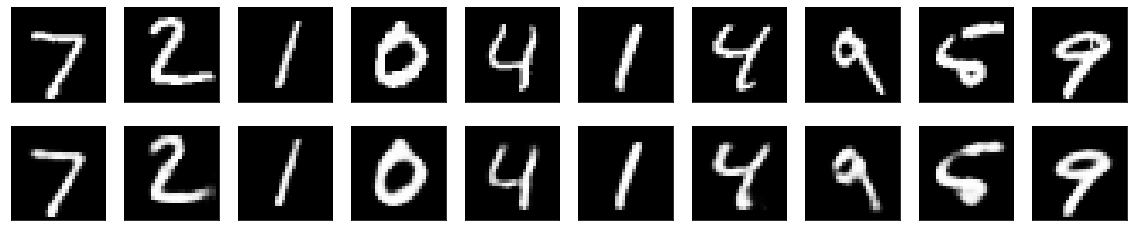

In [ ]:
import matplotlib.pyplot as plt

n = 10

plt.figure(figsize=(20,4))
for i in range(n):
    # 원본 이미지 출력
    ax = plt.subplot(2, n, i + 1) # (행 개수, 열 개수, 플랏 위치)
    plt.imshow(X_test[i].reshape(28, 28)) # 원본 형태의 2차원으로 재배열
    plt.gray() # 흑백
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 인코딩->디코딩 된 이미지 출력
    ax = plt.subplot(2, n, i+1+n)  # 열 개수가 10 이므로, 11번째는 다음줄에 위치됨
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()